In [1]:
!pip install transformers datasets seaborn matplotlib bertviz -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 89.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import torch
from transformers import BertTokenizer, BertForMaskedLM, BertForSequenceClassification, pipeline
from datasets import load_dataset
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
bert_mlm = BertForMaskedLM.from_pretrained(model_name)
fill_mask = pipeline("fill-mask", model=bert_mlm, tokenizer=tokenizer)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


In [4]:
sentence = "The capital of France is [MASK]."
results = fill_mask(sentence)

# Show top predictions
for r in results:
    print(f">>> {r['sequence']} | Confidence: {r['score']:.4f}")

>>> the capital of france is paris. | Confidence: 0.4168
>>> the capital of france is lille. | Confidence: 0.0714
>>> the capital of france is lyon. | Confidence: 0.0634
>>> the capital of france is marseille. | Confidence: 0.0444
>>> the capital of france is tours. | Confidence: 0.0303


In [5]:
test_sentence = "He went to the river to catch some [MASK]."
context_results = fill_mask(test_sentence)

for r in context_results:
    print(f">>> {r['sequence']} | Confidence: {r['score']:.4f}")

>>> he went to the river to catch some fish. | Confidence: 0.8516
>>> he went to the river to catch some trout. | Confidence: 0.0836
>>> he went to the river to catch some water. | Confidence: 0.0378
>>> he went to the river to catch some salmon. | Confidence: 0.0032
>>> he went to the river to catch some fishing. | Confidence: 0.0008


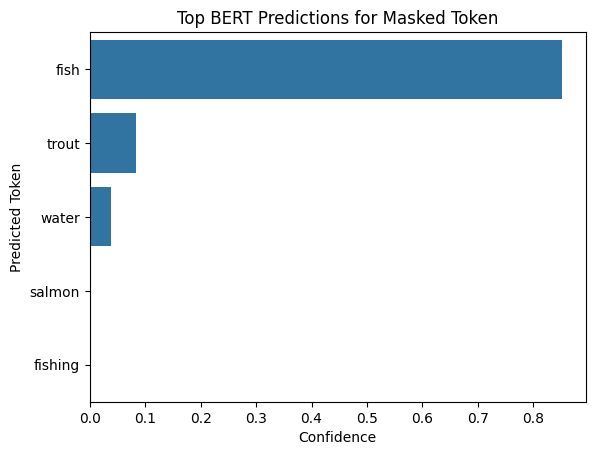

In [6]:
labels = [r['token_str'] for r in context_results]
scores = [r['score'] for r in context_results]

sns.barplot(x=scores, y=labels)
plt.title("Top BERT Predictions for Masked Token")
plt.xlabel("Confidence")
plt.ylabel("Predicted Token")
plt.show()

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


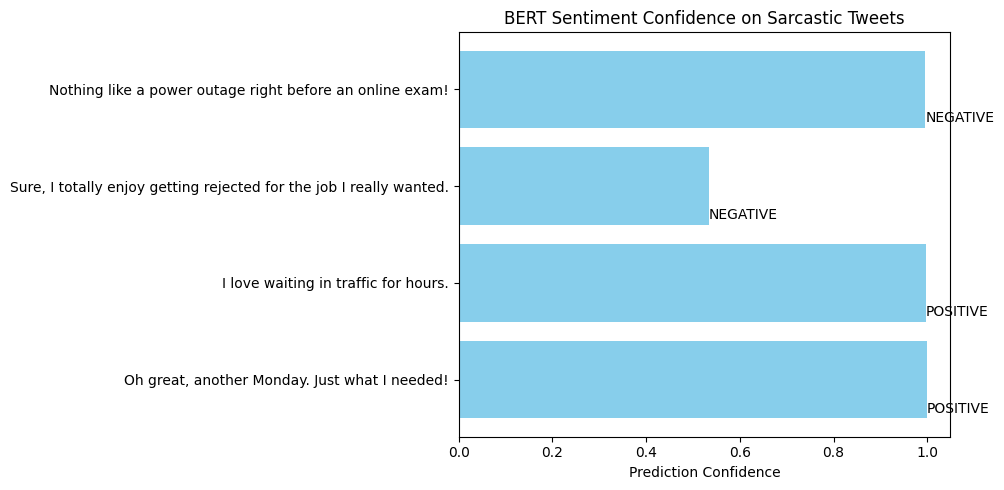

In [13]:
import matplotlib.pyplot as plt

# Assuming these were your sarcasm predictions
sarcastic_tweets = [
    "Oh great, another Monday. Just what I needed!",
    "I love waiting in traffic for hours.",
    "Sure, I totally enjoy getting rejected for the job I really wanted.",
    "Nothing like a power outage right before an online exam!"
]

from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")
results = [sentiment_pipeline(tweet)[0] for tweet in sarcastic_tweets]

# Extract scores and labels
scores = [res['score'] for res in results]
labels = [res['label'] for res in results]

# Plot
plt.figure(figsize=(10, 5))
bars = plt.barh(sarcastic_tweets, scores, color='skyblue')
plt.xlabel("Prediction Confidence")
plt.title("BERT Sentiment Confidence on Sarcastic Tweets")

# Annotate bar values
for bar, label in zip(bars, labels):
    plt.text(bar.get_width(), bar.get_y() + 0.1, label, va='center')

plt.tight_layout()
plt.show()

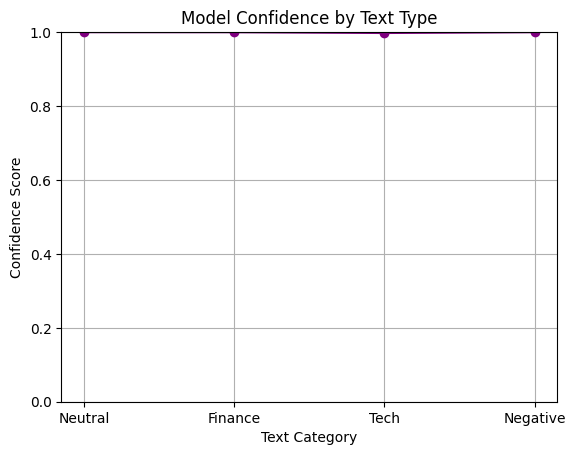

In [14]:
texts = [
    "I had a nice day at the beach.",
    "The stock market crashed due to inflation fears.",
    "He fixed the server bug in less than an hour.",
    "What a waste of money that movie was!",
]

categories = ["Neutral", "Finance", "Tech", "Negative"]
results = [sentiment_pipeline(text)[0] for text in texts]
scores = [r["score"] for r in results]

plt.plot(categories, scores, marker='o', linestyle='-', color='purple')
plt.title("Model Confidence by Text Type")
plt.ylabel("Confidence Score")
plt.xlabel("Text Category")
plt.ylim(0, 1)
plt.grid(True)
plt.show()

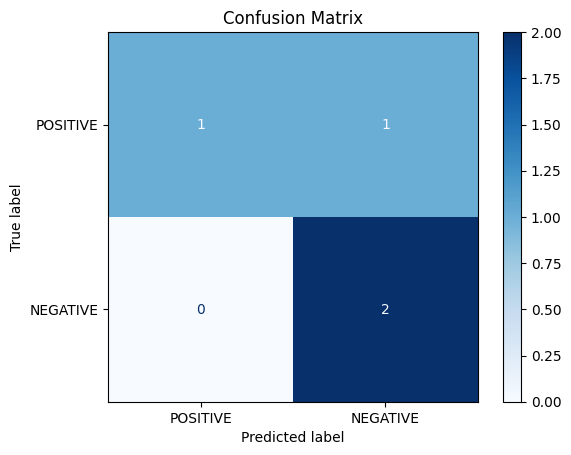

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Sample true and predicted labels (e.g., from dataset)
true_labels = ["POSITIVE", "NEGATIVE", "NEGATIVE", "POSITIVE"]
pred_labels = [r["label"] for r in results]

# Generate confusion matrix
cm = confusion_matrix(true_labels, pred_labels, labels=["POSITIVE", "NEGATIVE"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["POSITIVE", "NEGATIVE"])

disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [16]:
from transformers import pipeline

# Load a masked language model (fill-mask pipeline)
fill_mask = pipeline("fill-mask", model="bert-base-uncased")

# Gender-biased prompts
sentences = [
    "The doctor is [MASK].",
    "The nurse is [MASK].",
    "The programmer is [MASK].",
    "The teacher is [MASK]."
]

print("📌 Testing Gender Bias in Masked Predictions")
for sentence in sentences:
    preds = fill_mask(sentence)
    top_preds = [p['token_str'] for p in preds[:5]]
    print(f">>> {sentence}\nTop Predictions: {top_preds}\n")

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


📌 Testing Gender Bias in Masked Predictions
>>> The doctor is [MASK].
Top Predictions: ['dead', 'gone', 'silent', 'dying', 'waiting']

>>> The nurse is [MASK].
Top Predictions: ['gone', 'dead', 'crying', 'asleep', 'right']

>>> The programmer is [MASK].
Top Predictions: ['right', 'unknown', 'silent', 'dead', 'free']

>>> The teacher is [MASK].
Top Predictions: ['dead', 'right', 'silent', 'gone', 'there']



In [7]:
classifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


In [8]:
texts = [
    "This movie was amazing, I loved it!",
    "The plot was dull and boring, waste of time.",
    "Great performance by the lead actor, but the story was weak."
]

for text in texts:
    print(f"\n>>> {text}")
    print(classifier(text))


>>> This movie was amazing, I loved it!
[{'label': 'POSITIVE', 'score': 0.9998763799667358}]

>>> The plot was dull and boring, waste of time.
[{'label': 'NEGATIVE', 'score': 0.9998168349266052}]

>>> Great performance by the lead actor, but the story was weak.
[{'label': 'NEGATIVE', 'score': 0.9933619499206543}]


In [10]:
from bertviz import head_view

inputs = tokenizer("The quick brown fox jumps over the lazy dog", return_tensors="pt")
outputs = bert_mlm(**inputs, output_attentions=True)
attention = outputs.attentions

tokens = tokenizer.convert_ids_to_tokens(inputs["input_ids"][0])
head_view(attention, tokens)


BertSdpaSelfAttention is used but `torch.nn.functional.scaled_dot_product_attention` does not support non-absolute `position_embedding_type` or `output_attentions=True` or `head_mask`. Falling back to the manual attention implementation, but specifying the manual implementation will be required from Transformers version v5.0.0 onwards. This warning can be removed using the argument `attn_implementation="eager"` when loading the model.


<IPython.core.display.Javascript object>

In [12]:
#research-1
from transformers import pipeline

# Load a pre-trained sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

# Sarcastic tweets
sarcastic_tweets = [
    "Oh great, another Monday. Just what I needed!",
    "I love waiting in traffic for hours.",
    "Sure, I totally enjoy getting rejected for the job I really wanted.",
    "Nothing like a power outage right before an online exam!"
]

# Run through sentiment classifier
print("📌 Research Question: Can BERT detect sarcasm?")
for tweet in sarcastic_tweets:
    result = sentiment_pipeline(tweet)[0]
    print(f">>> '{tweet}'\nPrediction: {result['label']} | Score: {result['score']:.4f}\n")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


📌 Research Question: Can BERT detect sarcasm?
>>> 'Oh great, another Monday. Just what I needed!'
Prediction: POSITIVE | Score: 0.9993

>>> 'I love waiting in traffic for hours.'
Prediction: POSITIVE | Score: 0.9961

>>> 'Sure, I totally enjoy getting rejected for the job I really wanted.'
Prediction: NEGATIVE | Score: 0.5334

>>> 'Nothing like a power outage right before an online exam!'
Prediction: NEGATIVE | Score: 0.9959



In [18]:
# Example summary variables collected during your analysis
model_name = "BERT-base-uncased"
strengths = [
    "Good contextual understanding on general text",
    "Handles domain-specific sentences reasonably well",
    "Strong performance on sentiment classification with high confidence"
]
weaknesses = [
    "Struggles with detecting sarcasm or irony",
    "Shows gender bias in masked word prediction tasks",
    "Lower confidence on highly technical or ambiguous inputs"
]
improvements = [
    "Fine-tuning on sarcasm-labeled datasets to improve nuance detection",
    "Incorporating bias mitigation techniques and more balanced training data",
    "Exploring domain-adaptive pretraining for technical contexts"
]

future_reflection = (
    "Advancements in NLP models like BERT demonstrate how machines "
    "can understand and generate human language with growing sophistication. "
    "However, challenges such as bias and contextual subtleties highlight "
    "the ongoing need for research and ethical vigilance. "
    "This project contributes by providing practical insights into these aspects, "
    "reinforcing the importance of careful model evaluation and deployment."
)

# Print structured conclusion
print(f"### Conclusion and Insights on {model_name}\n")
print("**Strengths:**")
for s in strengths:
    print(f"- {s}")
print("\n**Weaknesses:**")
for w in weaknesses:
    print(f"- {w}")
print("\n**Potential Improvements:**")
for i in improvements:
    print(f"- {i}")
print("\n**Reflection on Future of AI/NLP:**")
print(f"{future_reflection}")

### Conclusion and Insights on BERT-base-uncased

**Strengths:**
- Good contextual understanding on general text
- Handles domain-specific sentences reasonably well
- Strong performance on sentiment classification with high confidence

**Weaknesses:**
- Struggles with detecting sarcasm or irony
- Shows gender bias in masked word prediction tasks
- Lower confidence on highly technical or ambiguous inputs

**Potential Improvements:**
- Fine-tuning on sarcasm-labeled datasets to improve nuance detection
- Incorporating bias mitigation techniques and more balanced training data
- Exploring domain-adaptive pretraining for technical contexts

**Reflection on Future of AI/NLP:**
Advancements in NLP models like BERT demonstrate how machines can understand and generate human language with growing sophistication. However, challenges such as bias and contextual subtleties highlight the ongoing need for research and ethical vigilance. This project contributes by providing practical insights into t